# Objective

- To understand how data scaling works
- Impact of data scaling on model parameters

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns

### Load car crash dataset

In [2]:
df = sns.load_dataset("car_crashes")[["total", "speeding", "alcohol", "not_distracted"]]

In [3]:
  df.head()

,total,speeding,alcohol,not_distracted
0,18.8,7.332,5.640,18.048
1,18.1,7.421,4.525,16.290
2,18.6,6.510,5.208,15.624
3,22.4,4.032,5.824,21.056
4,12.0,4.200,3.360,10.920


### 1. Data Scaling using Normalization

#### a. Normalization using pandas function

In [4]:
for column in ["speeding", "alcohol"]:
  df[column + '_normalized'] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

#### b. Normalization using Scikit learn

In [5]:
 from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [7]:
df_norm.head()

,total,speeding,alcohol,not_distracted,speeding_normalized,alcohol_normalized
0,0.716667,0.723426,0.479218,0.743710,0.723426,0.479218
1,0.677778,0.735048,0.347188,0.663440,0.735048,0.347188
2,0.705556,0.616088,0.428064,0.633030,0.616088,0.428064
3,0.916667,0.292505,0.501007,0.881056,0.292505,0.501007
4,0.338889,0.314442,0.209236,0.418246,0.314442,0.209236


#### Scatter plot on normal and scaled data

<Axes: xlabel='total', ylabel='speeding'>

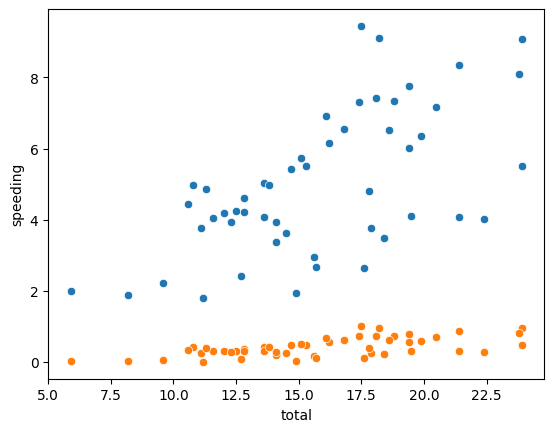

In [8]:
sns.scatterplot(df, x='total', y='speeding')
sns.scatterplot(df, x='total', y='speeding_normalized')

### 2. Data Scaling using Standardization

<Axes: xlabel='speeding', ylabel='Density'>

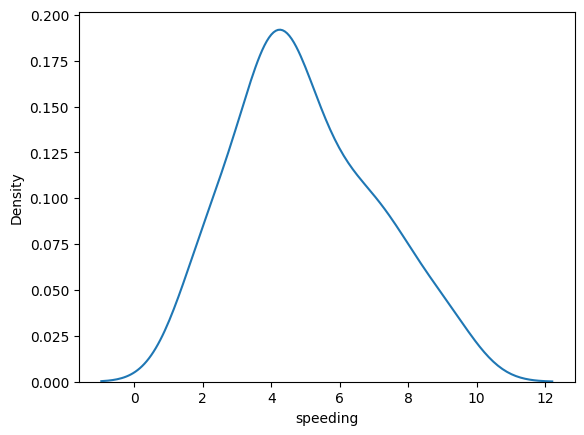

In [9]:
sns.kdeplot(df, x='speeding')

In [10]:
for column in ["speeding", "alcohol"]:
  df[column + '_standardized'] = (df[column] - df[column].mean()) / df[column].std()

<Axes: xlabel='speeding_standardized', ylabel='Density'>

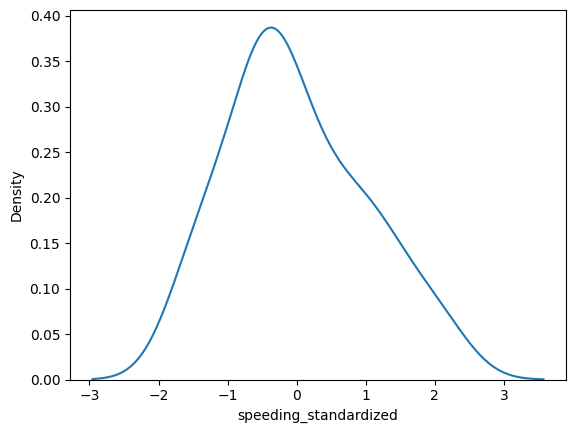

In [11]:
sns.kdeplot(df, x='speeding_standardized')

#### What did you observe?
- Does the scaled data now has 0 mean and 1 variance?

In [ ]:
df.head()

,total,speeding,alcohol,not_distracted,speeding_normalized,alcohol_normalized,speeding_standardized,alcohol_standardized
0,18.8,7.332,5.640,18.048,0.723426,0.479218,1.156638,0.435603
1,18.1,7.421,4.525,16.290,0.735048,0.347188,1.200747,-0.209229
2,18.6,6.510,5.208,15.624,0.616088,0.428064,0.749253,0.185767
3,22.4,4.032,5.824,21.056,0.292505,0.501007,-0.478849,0.542015
4,12.0,4.200,3.360,10.920,0.314442,0.209236,-0.395588,-0.882977


## Simple regression modeling

### 1. Simple linear regression With non-scaled features

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[['speeding', 'alcohol']], df['total'], test_size = 0.2, random_state=456)

regr = LinearRegression().fit(X_train, y_train)
print("Regression Coefficients: ", regr.coef_)

Regression Coefficients:  [-0.01361219  2.13016288]


### 2. Simple linear regression With scaled features

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df[['speeding_standardized', 'alcohol_standardized']], df['total'], test_size = 0.2, random_state=456)

regr = LinearRegression().fit(X_train, y_train)
print("Regression Coefficients: ", regr.coef_)

Regression Coefficients:  [-0.02746595  3.68333473]
